### Overview of the clinical problem

Degenerative spine conditions adversely affect people’s quality of life. Detecting these conditions is crucial for determining therapeutic plans for patients. Therefore, it is essential to develop methods for detecting and assessing the severity of degenerative spine conditions on imaging.
 
This challenge primarily focuses on identifying three types of conditions in the lumbar region of the spine (refer below for the anatomical overview). The three conditions we aim to assess are:
 
1. Foraminal narrowing (on either the left or right foramen at a specified level).
2. Subarticular stenosis (on either the left or right side at a specified level).
3. Canal stenosis (only at a specified level).
 
Each of these conditions can manifest at various levels within the spine itself, specifically at each vertebral disc (e.g., L4/5 corresponds to the vertebral disc between the L4 and L5 vertebral bodies).


For each of the conditions, you'll need to predict whether the degree of compression is normal/mild, moderate, or severe. You can refer to the example test submission `sample_submission.csv` to get a better idea for what we're looking for in terms of output. For each case, you'll have to output a score from 0 to 1 representing the probability of the patient having a specific grade (`normal_mild`, `moderate`, `severe`), at the spinal level (`l1_l2`, `l2_l3`, `l3_l4`, `l4_l5`, `l5_s1`), for that condition (`spinal_canal_stenosis`, `left_neural_foraminal_narrowing`, `right_neural_foraminal_narrowing`, `left_subarticular_stenosis`, `right_subarticular_stenosis`):


Let's talk a bit about the anatomy to get a sense for what we're asking you all to detect.

### Anatomical Overview

The spine is divided into four regions: the cervical region (with 7 vertebral bodies), the thoracic region (with 12 vertebral bodies), the lumbar region (with 5 vertebral bodies), and the sacral region (with 3-5 fused vertebral bodies). 

<img src="https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg" width=400/>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg)*

Between each vertebral body in all of the regions (except the sacrum) is a vertebral disc. Furthermore, along the posterior aspect of each vertebral body lies the spinal cord. At each vertebral body, spinal nerves leave the spinal cord through openings between vertebral bodies called foramina.

<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/78/1e/781e78be-8980-466f-8a82-83a5c8350770/herniated_disc_larger.jpg__720.0x600.0_q85_subject_location-360%2C300_subsampling-2.jpg" width=400/>  

*From [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*

Compression of the spinal cord or any of the nerves can cause pain to patients. Things that can cause compression of these nerves/the spinal cord include a bulging vertebral disc, degenerative changes in the bones itself (leading them to grow protrusions/become compressed), trauma, or thickening of the ligaments surrounding the spinal cord.

### Foraminal Narrowing Overview

The spinal cord has spinal nerves that exit the spinal canal through openings called foramina. The foramina are best viewed in the sagittal plane. Sometimes these openings can become compressed, resulting in foraminal narrowing. This compression results in pain for patients along the nerve distribution that is downstream of the compression. 

On the left, the image shows a sagittal MR slice where the foramina are visible. Crosshairs show where the foramina exit the spinal canal. On the right, the image shows our grading criteria for designating the degree of compression (note for this challenge, Normal/Mild is one label).
<p float="middle">
<img src="https://i.imgur.com/6c7erNM.png" width=300/>
<img src="https://i.imgur.com/b1VGiN5.png" width=300/>
</p>

### Subarticular Stenosis Overview

Subarticular stenosis is due to compression of the spinal cord in the subarticular zone (this compression can be best visualized in the axial plane).

On the left is a schematic showing the relevant anatomical zone. On the right is our grading criteria for designating the degree of subarticular stenosis (normal/mild is collapsed into one label for this challenge). 
<p float="middle">
<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/d5/08/d508ae6a-a4f2-4796-be9f-455f8df45fe1/herniation_zones.jpg__1700.0x1308.0_q85_subject_location-850%2C656_subsampling-2.jpg" width=300/>
<img src="https://i.imgur.com/Usuxgge.png" width=300/>
</p>

*Left image from [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*


### Canal Stenosis Overview

Canal stenosis is impingement on the spinal canal (where the spinal cord travels). Impingement can be due to a bulging vertebral disc, trauma, bony osteophytes (outgrowths of the vertebral bodies due to degenerative changes), or ligamental thickening (of the ligaments that run along the length of the spinal canal). The degree of compression is best assessed in the axial plane.

On the left, we show canal stenosis visible in the sagittal plane (to give an overview of what it looks like). On the right, we show our canal stenosis grading criteria (normal/mild are collapsed into one label). 

<p float="middle">
<img src="https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg" width=300/>
<img src="https://i.imgur.com/opjnAwl.png" width=300/>
</p>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg)*

### Imaging Overview

MRI imaging of the spine can be taken in three planes: the axial plane, the sagittal plane, and the coronal plane. The two main image types you'll need for this challenge are the axial and sagittal planes. The axial plane takes images horizonal slices (perpendicular to the spine) across the body from top to bottom. The sagittal plane takes vertical slices (parallel to the spine) going from left to right. 

MRI images come in multiple variants. They can generally be classified as either being T1 weighted or T2 weighted. T1 weighted images show fat as being brighter. The inner part of bones would appear brighter on T1 images. T2 images show water as brighter. The spinal canal would appear as brighter on T2 images. MRI images are not standardized with regards to the pixel values that are output from it (unlike CT images). So you'll need to figure out how to standardize these images (or maybe you wont need to at all, we'll leave it up to you). 

## Step 1: Environment Setup
* Ensure you have the necessary libraries installed. 
* If not, install them using the following commands:


## Step 2: Import Libraries
* Import the necessary libraries for data processing and visualization.

In [ ]:
#pip install tensorflow pandas matplotlib opencv-python

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import polars as pl

# Expected Directory Structure for Running This Notebook
* To execute this notebook smoothly, ensure the following directory structure is set up in your working environment:

# Dataset Directory

* This directory should contain all necessary datasets required for training and evaluation.
Ensure it includes subdirectories for both training and testing data, each organized by study IDs and series IDs.
Key files such as train.csv, test.csv, train_label_coordinates.csv, and series_descriptions.csv should be present for data annotation and exploration.

In [ ]:
def print_directory_tree(directory, depth=3, indent_size=4):
    """
    We use recursive search to traverse the structure and print the directory tree structure up to a specified depth,
    and skips printing 'train_images' and 'test_images'.

    :param directory: The directory to print.
    :param depth: The maximum depth to print.
    :param indent_size: The number of spaces to indent for each level.
    """
    print(f"{directory}")
    print_tree(directory, '', depth, indent_size)

    
def print_tree(directory, prefix, depth, indent_size):
    if depth <= 0:
        return

    files = os.listdir(directory)
    files.sort()
    for i, file in enumerate(files):
        full_path = os.path.join(directory, file)
        last = i == (len(files) - 1)
        if os.path.isdir(full_path):
            if full_path.endswith('/train_images') or full_path.endswith('/test_images'):
                continue  # Skip printing train_images and test_images
            print(f"{prefix}{'├── ' if not last else '└── '}{file}")
            print_tree(full_path, prefix + ('│   ' if not last else '    '), depth - 1, indent_size)
        else:
            print(f"{prefix}{'├── ' if not last else '└── '}{file}")

# Define the root directory to start the listing
root_directory = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification'


# Print the directory tree structure up to depth 3, skipping train_images and test_images
print_directory_tree(root_directory, depth=3)

## Step 3: Load the Data

In [ ]:
# Define file paths
data_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/'

train_images_dir = os.path.join(data_dir, 'train_images')
test_images_dir = os.path.join(data_dir, 'test_images')

train_csv = os.path.join(data_dir, 'train.csv')
train_label_coordinates_csv = os.path.join(data_dir, 'train_label_coordinates.csv')
train_series_descriptions_csv = os.path.join(data_dir, 'train_series_descriptions.csv')
test_series_descriptions_csv = os.path.join(data_dir, 'test_series_descriptions.csv')
sample_submission_csv = os.path.join(data_dir, 'sample_submission.csv')

# Load CSV files
train_df = pd.read_csv(train_csv)
train_label_coords_df = pd.read_csv(train_label_coordinates_csv)
train_series_desc_df = pd.read_csv(train_series_descriptions_csv)
test_series_desc_df = pd.read_csv(test_series_descriptions_csv)
sample_submission_df = pd.read_csv(sample_submission_csv)

In [ ]:
print("\nTraining Dataframe:")
train_df.head()

In [ ]:
print("\nTraining Series Descriptors:")
test_series_desc_df.head(5)

In [ ]:
print("\nTraining Labels:")
train_label_coords_df.head()

# Step 4: Explore the Data
Explore the structure and basic statistics of the loaded dataframes.

In [ ]:
print( "The Length of train_df:", len(train_df))
print("The Length of train_series_desc_df:", len(train_series_desc_df))
print("The Length of train_label_coords_df:", len(train_label_coords_df))

In [ ]:
train_series_desc_df['series_description'].value_counts()

In [ ]:
train_label_coords_df['condition'].value_counts()

In [ ]:
train_label_coords_df['level'].value_counts()

# Step 5: Explore the Data for a Single Series Id:
Explore the structure and basic statistics of the loaded dataframes.

In [ ]:
df_test = train_label_coords_df[train_label_coords_df['study_id']==100206310]

In [ ]:
df_test1 = train_label_coords_df[train_label_coords_df['series_id']==1012284084]
df_test2 = train_label_coords_df[train_label_coords_df['series_id']==1792451510]
df_test3 = train_label_coords_df[train_label_coords_df['series_id']==2092806862]

In [ ]:

# Directory path where your images are stored
image_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1012284084'
x = len(image_dir)

# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], label=f"{row['condition']} ({row['level']})", s=100, marker='x')
    
    plt.legend(loc='best')
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.show()

# Iterate over all expected instance numbers and plot annotations if they exist
for instance_number in range(1, 61):
    annotations = df_test1[df_test1['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")


In [ ]:
# Directory path where your images are stored
image_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/'
x = len(image_dir)

# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], s=100, marker='x')
        plt.text(row['x'] + 5, row['y'] + 5, f"{row['condition']} ({row['level']})", fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.5))

    # Adjusting the plot
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Count the number of DICOM images in the directory
num_images = len([name for name in os.listdir(image_dir) if name.endswith('.dcm')])

# Iterate over all DICOM images and plot annotations if they exist
for instance_number in range(1, num_images + 1):
    annotations = df_test2[df_test2['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")

In [ ]:
merged_df1 = train_label_coords_df[train_label_coords_df['series_id']==2092806862]
x=len(merged_df1)
# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], label=f"{row['condition']} ({row['level']})", s=100, marker='x')
    
    plt.legend(loc='best')
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.show()

# Check unique instance numbers in the filtered DataFrame
unique_instances = merged_df1['instance_number'].unique()
print("Unique instance numbers in merged_df2:", unique_instances)

# Check for missing instance numbers
expected_instances = set(range(1, x))  # Instances from 1 to 60
missing_instances = expected_instances - set(unique_instances)
print("Missing instance numbers:", missing_instances)

# Iterate over all expected instance numbers and plot annotations if they exist
for instance_number in range(1, 19):
    annotations = df_test3[df_test3['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")

# Step 6: Visualise the Data:

In [ ]:
import pandas as pd
import os
import pydicom

# Directory path where your images are stored
base_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'

# Function to count the number of DICOM images in the directory
def count_dicom_images(image_dir):
    return len([name for name in os.listdir(image_dir) if name.endswith('.dcm')])

# Initialize an empty DataFrame to store the annotations
all_annotations = pd.DataFrame()

# Iterate over all subfolders in the base directory
for study_id in os.listdir(base_dir):
    study_path = os.path.join(base_dir, study_id)
    if os.path.isdir(study_path):
        for series_id in os.listdir(study_path):
            series_path = os.path.join(study_path, series_id)
            if os.path.isdir(series_path):
                # Filter the annotations for the current series_id
                merged_df1 = train_label_coords_df[train_label_coords_df['series_id'] == int(series_id)]
                
                # Count the number of DICOM images in the series directory
                num_images = count_dicom_images(series_path)
                
                # Iterate over all DICOM images and filter annotations if they exist
                for instance_number in range(1, num_images + 1):
                    image_path = os.path.join(series_path, f"{instance_number}.dcm")
                    if os.path.exists(image_path):
                        annotations = merged_df1[merged_df1['instance_number'] == instance_number]
                        if not annotations.empty:
                            all_annotations = pd.concat([all_annotations, annotations])

# Reset the index of the resulting DataFrame
all_annotations.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
all_annotations.head()

In [ ]:
# Concatenate study_id with condition into a new column
all_annotations['study_condition'] = all_annotations['study_id'].astype(str) + '_' + all_annotations['condition']

# Display the resulting DataFrame with the new column
print(all_annotations.head())

In [ ]:
all_annotations.head(26)
len(all_annotations)

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
import pydicom
import matplotlib.pyplot as plt

# Load the dataframes
df_labels = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv')
train_df = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')

# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Image directory
image_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'



# Function to load and preprocess an image
def load_image(image_path, image_size=(224, 224)):
    ds = pydicom.dcmread(image_path)
    img = ds.pixel_array
    
    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Stack grayscale image to 3 channels
    img = np.stack([img] * 3, axis=-1)
    
    # Resize image to specified size
    img = Image.fromarray((img * 255).astype(np.uint8)).resize(image_size)
    img = np.array(img) / 255.0  # Normalize to [0, 1]
    
    return img

# Function to extract a patch from an image
def extract_patch(image, x, y, patch_size=224):
    height, width, _ = image.shape
    x = int(x)
    y = int(y)
    
    x1 = max(0, x - patch_size // 2)
    y1 = max(0, y - patch_size // 2)
    x2 = min(width, x + patch_size // 2)
    y2 = min(height, y + patch_size // 2)
    
    patch = image[y1:y2, x1:x2]
    patch = Image.fromarray((patch * 255).astype(np.uint8)).resize((patch_size, patch_size))
    patch = np.array(patch) / 255.0  # Normalize to [0, 1]
    
    return patch

# Example of using the functions
image_path = os.path.join(image_dir, '100206310', '2092806862', '1.dcm')
image = load_image(image_path)
x, y = 244.664395, 105.670385
patch = extract_patch(image, x, y)
plt.imshow(patch)
plt.show()

In [ ]:
def extract_patch(image, x, y, patch_size=224):
    height, width, _ = image.shape
    x = int(x)
    y = int(y)
    
    x1 = max(0, x - patch_size // 2)
    y1 = max(0, y - patch_size // 2)     41 image = load_image(image_path)
     42 x, y = 244.664395, 105.670385
---> 43 patch = extract_patch(image, x, y)
     44 plt.imshow(patch)
     45 plt.show()

Cell In[7], line 12, in extract_patch(image, x, y, patch_size)
      9 y2 = min(height, y + patch_size // 2)
     11 patch = image[y1:y2, x1:x2]
---> 12 patch = Image.fromarray(patch).resize(IMAGE_SIZE)
     13 patch = np.array(patch) / 255.0
     14 return patch

File /opt/conda/lib/python3.10/site-packages/PIL/Image.py:3092, in fromarray(obj, mode)
   3090     except KeyError as e:
   3091         msg = "Cannot handle this data type: %s, %s" % typekey
-> 3092         raise TypeError(msg) from e
   3093 else:
   3094     rawmode = mode

TypeError: Cannot handle this data type: (1, 1, 3), <f8

    x2 = min(width, x + patch_size // 2)
    y2 = min(height, y + patch_size // 2)
    
    patch = image[y1:y2, x1:x2]
    patch = Image.fromarray(patch).resize(IMAGE_SIZE)
    patch = np.array(patch) / 255.0
    return patch

# Example of extracting a patch
image_path = os.path.join(image_dir, '100206310', '2092806862', '1.dcm')
image = load_image(image_path)
x, y = 244.664395, 105.670385
patch = extract_patch(image, x, y)
plt.imshow(patch)
plt.show()


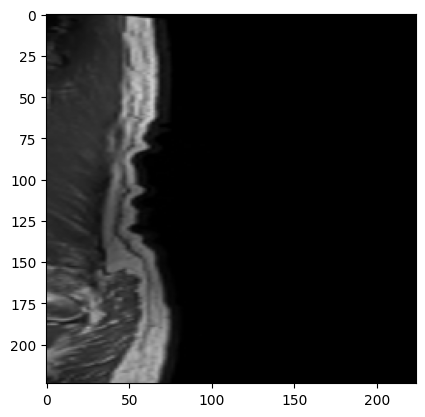

In [11]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
import pydicom
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
IMAGE_DIR = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'
LABEL_COORDINATES_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv'
TRAIN_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv'

def load_image(image_path, image_size=(224, 224)):
    """
    Load a DICOM image from the specified path, resize it to the given size, and normalize pixel values.
    
    Args:
    - image_path (str): Path to the DICOM image file.
    - image_size (tuple): Target size for the image resize operation.
    
    Returns:
    - img (numpy.ndarray): Loaded and processed image as a NumPy array.
    """
    ds = pydicom.dcmread(image_path)
    img = ds.pixel_array
    
    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Resize image to specified size
    img = Image.fromarray((img * 255).astype(np.uint8)).resize(image_size)
    img = np.array(img) / 255.0  # Normalize to [0, 1]
    
    # Convert grayscale to 3 channels
    if len(img.shape) == 2:
        img = np.stack([img] * 3, axis=-1)
    
    return img

def extract_patch(image, x, y, patch_size=224):
    """
    Extract a patch from the input image centered at coordinates (x, y).
    
    Args:
    - image (numpy.ndarray): Input image as a NumPy array.
    - x (float): X-coordinate for the center of the patch.
    - y (float): Y-coordinate for the center of the patch.
    - patch_size (int): Size of the square patch to extract.
    
    Returns:
    - patch (numpy.ndarray): Extracted patch as a NumPy array.
    """
    height, width, channels = image.shape
    x = int(x)
    y = int(y)
    
    x1 = max(0, x - patch_size // 2)
    y1 = max(0, y - patch_size // 2)
    x2 = min(width, x + patch_size // 2)
    y2 = min(height, y + patch_size // 2)
    
    patch = image[y1:y2, x1:x2]
    patch = Image.fromarray((patch * 255).astype(np.uint8)).resize((patch_size, patch_size))
    patch = np.array(patch) / 255.0  # Normalize to [0, 1]
    
    return patch


# Example of extracting a patch
image_path = os.path.join(IMAGE_DIR, '100206310', '2092806862', '1.dcm')
image = load_image(image_path)
x, y = 244.664395, 105.670385
patch = extract_patch(image, x, y)
plt.imshow(patch)
plt.show()


In [8]:
def build_model(input_shape=(224, 224, 3), num_classes=3):
    """
    Build a convolutional neural network model using the ResNet50 architecture.
    
    Args:
    - input_shape (tuple): Shape of input images (height, width, channels).
    - num_classes (int): Number of output classes for classification.
    
    Returns:
    - model (tensorflow.keras.Model): Compiled Keras model.
    """
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pydicom
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
IMAGE_DIR = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'

# Load dataframes
TRAIN_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv'
LABEL_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv'

train_df = pd.read_csv(TRAIN_FILE)
label_df = pd.read_csv(LABEL_FILE)

def load_image(image_path, target_size):
    ds = pydicom.dcmread(image_path)
    img = ds.pixel_array
    img = np.stack([img] * 3, axis=-1)  # Convert to 3-channel image
    img = Image.fromarray(img).resize(target_size)
    img = np.array(img) / 255.0  # Normalize to range [0, 1]
    return img

def extract_patch(image, x, y, patch_size=64):
    height, width, _ = image.shape
    x1 = max(0, int(x - patch_size // 2))
    x2 = min(width, int(x + patch_size // 2))
    y1 = max(0, int(y - patch_size // 2))
    y2 = min(height, int(y + patch_size // 2))
    patch = image[y1:y2, x1:x2]
    return patch

In [18]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import pydicom

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
IMAGE_DIR = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'

# Load dataframes
TRAIN_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv'
LABEL_FILE = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv'

train_df = pd.read_csv(TRAIN_FILE)
label_df = pd.read_csv(LABEL_FILE)

def load_image(image_path, target_size):
    ds = pydicom.dcmread(image_path)
    img = ds.pixel_array
    img = np.stack([img] * 3, axis=-1)  # Convert to 3-channel image
    img = Image.fromarray(img).resize(target_size)
    img = np.array(img) / 255.0  # Normalize to range [0, 1]
    return img

def extract_patch(image, x, y, patch_size=64):
    height, width, _ = image.shape
    x1 = max(0, int(x - patch_size // 2))
    x2 = min(width, int(x + patch_size // 2))
    y1 = max(0, int(y - patch_size // 2))
    y2 = min(height, int(y + patch_size // 2))
    patch = image[y1:y2, x1:x2]
    return patch

def prepare_data(df_labels, train_df):
    num_samples = len(train_df)
    X = np.zeros((num_samples, IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    y = np.zeros((num_samples,))
    
    for idx, row in train_df.iterrows():
        study_id = str(row['study_id'])  # Convert to string
        
        # Find corresponding label row in df_labels
        label_rows = df_labels[df_labels['study_id'] == study_id]
        
        if len(label_rows) > 0:
            label_row = label_rows.iloc[0]
            series_id = str(label_row['series_id'])  # Convert to string
            instance_number = row['instance_number']
            
            # Construct image path
            image_path = os.path.join(IMAGE_DIR, study_id, series_id, f"{instance_number}.dcm")
            
            if os.path.exists(image_path):
                # Load image and extract patch
                image = load_image(image_path, IMAGE_SIZE)
                x, y = label_row['x'], label_row['y']
                patch = extract_patch(image, x, y)
                X[idx] = patch
                y[idx] = 1  # Example: Assuming binary classification, modify as needed
       
    return X, y

# Example usage
X, y = prepare_data(label_df, train_df)
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (1975, 224, 224, 3), y shape: (1975,)


In [19]:
# Load CSV files
df_labels = pd.read_csv(LABEL_COORDINATES_FILE)
train_df = pd.read_csv(TRAIN_FILE)

# Prepare data
#X, y = prepare_data(df_labels, train_df)

# Build and compile the model
#model = build_model(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), num_classes=3)
#model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

# Train the model (replace with actual training data and labels)
#history = model.fit(X, y, epochs=10, batch_size=BATCH_SIZE)

# Print model summary
#model.summary()

In [ ]:
pip install --upgrade pandas


In [3]:
import tensorflow as tf

def mixup(image, label, alpha=0.2):
    # Create mixup coefficients
    beta = tf.random.uniform([], 0.0, 1.0)
    mixup_image = beta * image + (1 - beta) * tf.reverse(image, axis=[0])
    mixup_label = beta * label + (1 - beta) * label  # Adjust labels as needed
    return mixup_image, mixup_label

def cutmix(image_batch, label_batch, alpha=0.2):
    # Generate random box coordinates
    image_shape = tf.shape(image_batch)
    cut_h = tf.cast(image_shape[1] * tf.random.uniform([], 0.0, 1.0), tf.int32)
    cut_w = tf.cast(image_shape[2] * tf.random.uniform([], 0.0, 1.0), tf.int32)
    cut_y = tf.random.uniform([], 0, image_shape[1] - cut_h, dtype=tf.int32)
    cut_x = tf.random.uniform([], 0, image_shape[2] - cut_w, dtype=tf.int32)
    # Apply cutmix
    image_patch = image_batch[:, cut_y:cut_y+cut_h, cut_x:cut_x+cut_w, :]
    mixed_image = image_batch.numpy().copy()
    mixed_image[:, cut_y:cut_y+cut_h, cut_x:cut_x+cut_w, :] = image_patch
    # Adjust labels as needed
    return mixed_image, label_batch

# Usage example:
# Assume `image_batch` and `label_batch` are your TensorFlow tensors
mixed_image, mixed_label = mixup(image_batch, label_batch)
cutmixed_image, cutmixed_label = cutmix(image_batch, label_batch)


2024-07-10 13:25:35.744212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 13:25:35.744321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 13:25:35.911167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'image_batch' is not defined

In [ ]:
import tensorflow as tf

def autoaugment(image):
    # Apply AutoAugment policies here
    augmented_image = tf.image.random_brightness(image, max_delta=0.2)
    augmented_image = tf.image.random_contrast(augmented_image, lower=0.5, upper=1.5)
    # Add more policies as needed
    return augmented_image

# Usage example:
augmented_image = autoaugment(image)


In [4]:
# Example using PyTorch (similar concept applies to other libraries)
import torch
import torchvision.transforms as transforms
from torchvision.transforms import functional as F
from PIL import Image

def style_augment(image):
    # Load style image
    style_image = Image.open('style_image.jpg')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),  # Resize to match the input image size
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(20),
        transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
        transforms.RandomResizedCrop((224, 224)),
        transforms.GaussianBlur(3),
        transforms.RandomErasing(),
        transforms.RandomApply([
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2)
        ], p=0.8),
        transforms.RandomApply([
            transforms.Grayscale(num_output_channels=3)
        ], p=0.2),
        transforms.RandomApply([
            transforms.RandomRotation(45)
        ], p=0.5),
        transforms.RandomApply([
            transforms.RandomRotation(15)
        ], p=0.2)
    ])
    image = transform(image)
    return image


In [24]:
import imgaug.augmenters as iaa
import numpy as np
import os
import pandas as pd
import pydicom
from PIL import Image

# Function to load and augment image
def load_and_augment_image(image_path, augmenter):
    ds = pydicom.dcmread(image_path)
    img = ds.pixel_array
    img = np.stack([img] * 3, axis=-1)  # Convert to 3-channel image

    # Normalize to range [0, 255]
    img = img.astype(np.float32)
    img = 255 * (img - np.min(img)) / (np.max(img) - np.min(img))
    img = img.astype(np.uint8)

    img = Image.fromarray(img).resize(IMAGE_SIZE)
    img = np.array(img) / 255.0  # Normalize to range [0, 1]

    # Apply augmentation
    augmented_img = augmenter(image=img)

    return augmented_img

# Example function to apply augmentations to the dataset
def augment_dataset(image_dir, train_df, augmenter):
    augmented_images = []
    for idx, row in train_df.iterrows():
        image_path = os.path.join(IMAGE_DIR, row['study_id'], row['series_id'], f"{row['instance_number']}.dcm")
        if os.path.exists(image_path):
            augmented_img = load_and_augment_image(image_path, augmenter)
            augmented_images.append(augmented_img)
    return np.array(augmented_images)

# Define augmentation techniques using imgaug
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips with 50% probability
    iaa.Affine(rotate=(-10, 10)),  # Random rotations between -10 to 10 degrees
    iaa.GaussianBlur(sigma=(0.0, 3.0)),  # Gaussian blur with sigma between 0.0 to 3.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Gaussian noise with scale up to 5% of pixel intensity
    iaa.PerspectiveTransform(scale=(0.01, 0.1)),  # Perspective transformations
    iaa.Resize({"height": (0.8, 1.2), "width": (0.8, 1.2)})  # Random resizing between 80% to 120%
])

# Assuming you have a dataset_df that contains your data
# Example: dataset_df = pd.read_csv('your_dataset.csv')

# Apply augmentations to the dataset
augmented_images = augment_dataset(IMAGE_DIR, train_df, augmenter)

# Calculate the size of the augmented dataset
original_size = len(train_df)
new_size = len(augmented_images)

print(f"Original dataset size: {original_size}")
print(f"Augmented dataset size: {new_size}")


KeyError: 'series_id'